In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from importlib import reload
import sys 
import pandas as pd
import numpy as np
import sys 
sys.path.append('/Users/Santiago PC/Documents/Photometry/Quarter1/time_triggered_average/')
import photometry_3
import time_triggered_average
get_ipython().magic('matplotlib qt5')
import matplotlib.pyplot as plt
import scipy.ndimage

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plot_averages(df, channel_to_align, Fs,  x_lims_list, y_lims_list):
    
    time_base = np.divide(df.index.values, Fs)
    
    plt.subplot(3,1,1)
    plt.plot(time_base, df[channel_to_align], 'b')
    plt.xlabel('time (seconds)')
    plt.ylabel(channel_to_align)
    plt.ylim(y_lims_list[0][0], y_lims_list[0][1])
    #plt.xlim(50000, 150000)
    plt.subplot(3,1,2)
    plt.plot(time_base, df['channel_1_demod_F_F0'], 'g')
    plt.xlabel('time (seconds)')
    plt.ylabel('F/F0 488')
    plt.ylim(y_lims_list[1][0], y_lims_list[1][1])
    #plt.xlim(50000, 150000)
    plt.subplot(3,1,3)
    plt.plot(time_base, df['channel_2_demod_F_F0'])
    plt.xlabel('time (seconds)')
    plt.ylabel('F/F0 405')
    plt.ylim(y_lims_list[2][0], y_lims_list[2][1])
    #plt.xlim(50000, 150000)
    plt.show()
    return(True)

def plot_individual_events(df, channel_to_align, Fs,  x_lims_list, y_lims_list):
    
    time_base = np.divide(df.index.values, Fs)
    
    plt.subplot(2,1,1)
    for event in df[channel_to_align].columns:   
        plt.plot(df[channel_to_align][event])
    plt.xlabel('time (seconds)')
    plt.ylabel(channel_to_align)
    plt.ylim(y_lims_list[0][0], y_lims_list[0][1])
    #plt.xlim(50000, 150000)
    plt.subplot(2,1,2)
    for event in df['channel_1_demod_F_F0'].columns:   
        plt.plot(df['channel_1_demod_F_F0'][event])
    plt.xlabel('time (seconds)')
    plt.ylabel('F/F0 488')
    plt.ylim(y_lims_list[1][0], y_lims_list[1][1])
    plt.show()
    return(True)

In [8]:
reload(photometry_3)
reload(time_triggered_average)

<module 'time_triggered_average' from 'C:\\Users\\Santiago PC\\Documents\\Photometry Code S2\\photometry_analysis-master\\time_triggered_average.py'>

In [3]:
directory = '/Users/Santiago PC/Documents/Photometry Data S2/07102019/'
f_name = '19710002_F_F0behavior_added.h5'
df_from_file = photometry_3.photometry_df_from_file(directory + f_name)
channel_to_align = 'Digging Manual'

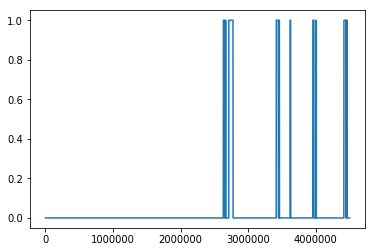

In [4]:
plt.plot(df_from_file.class_df[channel_to_align].values)
plt.show()

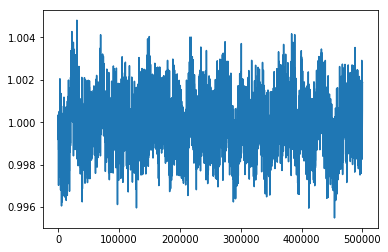

In [5]:
plt.plot(df_from_file.class_df.loc['sweep005']['channel_1_demod_F_F0'].values)
plt.show()

In [ ]:
#df_from_file.class_df
#display spreadsheet w data

In [6]:
if channel_to_align == 'Acceleration':
    mean_=np.nanmean(df_from_file.class_df[channel_to_align].values)
    std_=np.nanstd(df_from_file.class_df[channel_to_align].values)
    threshold = mean_ + 4*std_
    print(mean_)
    print(std_)
    print(threshold)
    time_threshold = 0
    
if channel_to_align == 'Digging Manual':
    threshold = 0.5
    time_threshold = 1

In [21]:
# return regions in traces "triggered" around an amplitude threshold in a given trace 
regions = time_triggered_average.align_on_trigger(df_from_file.class_df, 10000, 
                                                     channel_to_align, 
                                                     ['channel_1_demod_F_F0', 'channel_2_demod_F_F0'],
                                                     threshold, 'up', 
                                                     time_threshold, 
                                                     5, (0, 0))

100000later
100000earlier
100000middle
100000later
100000middle
100000later
100000earlier
100000middle
100000later
100000middle
100000later
100000earlier
100000middle
100000later
100000middle


In [22]:
regions

{('channel_1_demod_F_F0', 'sweep005'):          464621
 0      0.998507
 1      0.998504
 2      0.998502
 3      0.998500
 4      0.998498
 5      0.998497
 6      0.998496
 7      0.998495
 8      0.998495
 9      0.998496
 10     0.998496
 11     0.998498
 12     0.998499
 13     0.998501
 14     0.998504
 15     0.998507
 16     0.998510
 17     0.998514
 18     0.998518
 19     0.998522
 20     0.998527
 21     0.998532
 22     0.998538
 23     0.998543
 24     0.998549
 25     0.998556
 26     0.998562
 27     0.998569
 28     0.998576
 29     0.998583
 ...         ...
 99970       NaN
 99971       NaN
 99972       NaN
 99973       NaN
 99974       NaN
 99975       NaN
 99976       NaN
 99977       NaN
 99978       NaN
 99979       NaN
 99980       NaN
 99981       NaN
 99982       NaN
 99983       NaN
 99984       NaN
 99985       NaN
 99986       NaN
 99987       NaN
 99988       NaN
 99989       NaN
 99990       NaN
 99991       NaN
 99992       NaN
 99993       NaN
 99994    

In [23]:
#average the triggered regions across channels
unsorted_regions = time_triggered_average.return_events(regions)
unsorted_regions_mean = unsorted_regions.mean(axis=1, level=0)

In [24]:
unsorted_regions

channel_2_demod_F_F0                                          \
                  sweep006  sweep008  sweep005  sweep007             
                    45952     413928    464621    80634     620951   
0                      NaN  1.035537  0.976209  0.967030  1.026300   
1                      NaN  1.035609  0.977411  0.966776  1.025797   
2                      NaN  1.035669  0.978608  0.966577  1.025311   
3                      NaN  1.035717  0.979798  0.966435  1.024842   
4                      NaN  1.035755  0.980980  0.966349  1.024392   
5                      NaN  1.035782  0.982153  0.966320  1.023959   
6                      NaN  1.035799  0.983316  0.966349  1.023545   
7                      NaN  1.035806  0.984469  0.966434  1.023149   
8                      NaN  1.035803  0.985609  0.966578  1.022773   
9                      NaN  1.035791  0.986735  0.966779  1.022415   
10                     NaN  1.035771  0.987848  0.967038  1.022077   
11                     NaN  1.035742  0.988945  0.967356  1.021758   
12                     NaN  1.035705  0.990026  0.967731  1.021459   
13                     NaN  1.035661  0.991090  0.968164  1.021179   
14                     NaN  1.035610  0.992136  0.968655  1.020920   
15                     NaN  1.035553  0.993163  0.969204  1.020680   
16                     NaN  1.035489  0.994170  0.969810  1.020460   
17                     NaN  1.035421  0.995157  0.970473  1.020260   
18                     NaN  1.035347  0.996123  0.971194  1.020080   
19                     NaN  1.035269  0.997066  0.971971  1.019919   
20                     NaN  1.035188  0.997987  0.972804  1.019779   
21                     NaN  1.035103  0.998884  0.973692  1.019658   
22                     NaN  1.035016  0.999757  0.974636  1.019556   
23                     NaN  1.034927  1.000606  0.975634  1.019474   
24                     NaN  1.034836  1.001429  0.976686  1.019412   
25                     NaN  1.034745  1.002226  0.977791  1.019369   
26                     NaN  1.034654  1.002998  0.978949  1.019344   
27                     NaN  1.034563  1.003742  0.980158  1.019338   
28                     NaN  1.034474  1.004459  0.981418  1.019351   
29                     NaN  1.034387  1.005149  0.982728  1.019382   
...                    ...       ...       ...       ...       ...   
99970             1.037116  0.960505       NaN  1.074494       NaN   
99971             1.034271  0.960772       NaN  1.073702       NaN   
99972             1.031444  0.961092       NaN  1.072865       NaN   
99973             1.028636  0.961465       NaN  1.071985       NaN   
99974             1.025846  0.961892       NaN  1.071061       NaN   
99975             1.023078  0.962374       NaN  1.070093       NaN   
99976             1.020332  0.962911       NaN  1.069081       NaN   
99977             1.017609  0.963504       NaN  1.068027       NaN   
99978             1.014910  0.964152       NaN  1.066929       NaN   
99979             1.012236  0.964856       NaN  1.065788       NaN   
99980             1.009589  0.965617       NaN  1.064606       NaN   
99981             1.006970  0.966434       NaN  1.063381       NaN   
99982             1.004378  0.967307       NaN  1.062115       NaN   
99983             1.001817  0.968238       NaN  1.060808       NaN   
99984             0.999285  0.969226       NaN  1.059461       NaN   
99985             0.996785  0.970270       NaN  1.058073       NaN   
99986             0.994316  0.971372       NaN  1.056646       NaN   
99987             0.991880  0.972530       NaN  1.055181       NaN   
99988             0.989478  0.973745       NaN  1.053677       NaN   
99989             0.987110  0.975017       NaN  1.052136       NaN   
99990             0.984776  0.976346       NaN  1.050559       NaN   
99991             0.982478  0.977731       NaN  1.048945       NaN   
99992             0.980216  0.979172       NaN  1.047297       NaN   
99993           

In [26]:
#if checking later
df_from_file = pd.read_hdf(directory+'19710002_F_F0behavior_addedDiggingunsorted.h5')

FileNotFoundError: File /Users/Santiago PC/Documents/Photometry Data S2/07102019/19710002_F_F0behavior_addedDiggingunsorted.h5 does not exist

In [ ]:
#in tandem with the cell from above
unsorted_regions = df_from_file

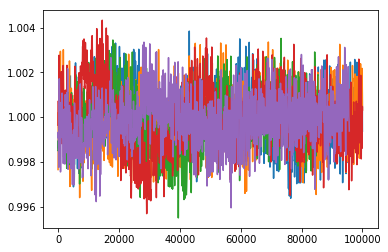

In [28]:
plt.plot(unsorted_regions['channel_1_demod_F_F0'])
plt.show()

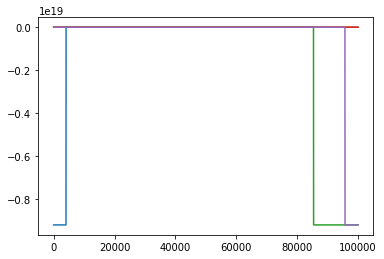

In [29]:
plt.plot(unsorted_regions['Digging Manual'])
plt.show()

In [27]:
plt.subplots(2,1,1)
plt.plot(unsorted_regions['channel_1_demod_F_F0'])
plt.subplots(2,1,2)
plt.plot(unsorted_regions['Digging Manual'])
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1324: UserWarning: sharex argument to subplots() was an integer. Did you intend to use subplot() (without 's')?
  "sharex argument to subplots() was an integer. "


ValueError: sharex [1] must be one of ['all', 'row', 'col', 'none']

<Figure size 432x288 with 0 Axes>

In [ ]:
#sort events by additional criteria 
sorted_events, means_by_channel = time_triggered_average.return_sorted_events(unsorted_regions, channel_to_align , 'before', threshold, 40000)

In [ ]:
#save results to hdf file 
unsorted_regions.to_hdf(directory + f_name.rstrip('.h5') + channel_to_align + 'unsorted.h5', key='df', format='table')
sorted_events.to_hdf(directory + f_name.rstrip('.h5') + channel_to_align + 'sorted_before.h5', key='df')
means_by_channel.to_hdf(directory + f_name.rstrip('.h5') + channel_to_align + 'sorted_means_before.h5', key='df')

In [ ]:
#plot average trace from sorted regions 
df_from_file.Fs
plot_averages(means_by_channel, channel_to_align, df_from_file.Fs, [(),(),()], [(-.1, 1.2),(.98, 1.01),(.98, 1.025)])

In [ ]:
plt.subplot(2,1,1)
plt.plot(unsorted_regions['Grooming'])
plt.subplot(2,1,2)
plt.plot(unsorted_regions['channel_1_demod_F_F0'])
plt.show()

In [ ]:
unsorted_regions['channel_1_demod_F_F0'].loc[50000:60000].max().values

In [ ]:
max_during_grooming = unsorted_regions['channel_1_demod_F_F0'].loc[50000:60000].max().values

In [ ]:
max_before_grooming = unsorted_regions['channel_1_demod_F_F0'].loc[40000:50000].max().values

In [ ]:
plt.scatter(np.ones(len(max_during_grooming)), max_during_grooming)

In [ ]:
plt.scatter(np.ones(len(max_before_grooming)), max_before_grooming)

In [ ]:
max_before_grooming.max()

In [ ]:
max_during_grooming.max()

In [ ]:
plt.hist([max_before_grooming, max_during_grooming])
plt.show()
plt.suptitle('AAV_Synflex_004 D1')
plt.xlabel('Fluoresence')
plt.ylabel('Frequency')

In [ ]:
max_before = [1.011622661,1.028583386]
max_during = [1.014063491,1.025865516]

In [ ]:
unsorted_regions['channel_1_demod_F_F0'].loc[50000:60000].max()

In [ ]:
#plot individual traces of sorted events
plot_individual_events(sorted_events, channel_to_align, df_from_file.Fs, [(),(),()], [(-.1, 1.2),(.98, 1.025),(.98, 1.025)])

In [ ]:
#get peak of events in individual traces
peak_df = pd.DataFrame(sorted_events[30000:50000].max(axis=0), columns = ['peak amplitude']).transpose()

In [ ]:
#calculate latency to peak 
latency_samples_of_peak_df = pd.DataFrame(sorted_events[30000:50000].idxmax(axis=0), columns = ['peak latency']).transpose()
#convert to seconds
time_of_peak_df = latency_samples_of_peak_df.apply(lambda x: (50001-x)/df_from_file.Fs)

In [ ]:
# fiter photometry signal but leave behavior channels 
dfs = []
names = []
for channel in ['channel_1_demod_F_F0', 'channel_2_demod_F_F0']:
    by_channel = {}
    for event in sorted_events['channel_1_demod_F_F0'].columns.values:
        by_channel[event] = sorted_events[channel][event].apply((lambda x: photometry_3.gaussian_filter_signal(x, 200)))
    dfs.append(pd.DataFrame(by_channel))
    names.append(channel)

dfs.append(sorted_events['Acceleration'])
names.append('Acceleration')

filt_df = pd.concat(dfs, keys=names, axis=1)

In [ ]:
plot_individual_events(filt_df, channel_to_align, df_from_file.Fs, [(),(),()], [(-.1, 2000),(.90, 1.05),(.95, 1.05)])

In [ ]:
dfs_output = pd.concat([peak_df, time_of_peak_df])

In [ ]:
dfs_output

In [ ]:
plt.scatter(dfs_output['channel_1_demod_F_F0'].loc['peak latency'].values, dfs_output[channel_to_align].loc['peak amplitude'].values)

In [ ]:

dfs_output.to_hdf(directory+f_name.rstrip('behavior_added.h5')+'_'+str(channel_to_align)+'_bouts_sorted_before_peak.h5', key='df')

In [ ]:
#for grooming analysis
# does the peak F_F0 proximal to grooming onset correlate with bout length

# get bout lengths
df = sorted_events
bout_lengths = {}
for index in df[channel_to_align].columns:  
    out = time_triggered_average.measure_bout_lengths(df[channel_to_align][index], start_index=40000, threshold=.5)
    if out[0][0] == int(len(df[channel_to_align][index])/2)+1:
        bout_lengths[index] = out[1][0]
#list(bout_lengths.items())

In [ ]:
# from bout length dictionary get the peak in the F_F0 trace 
F_F0_peaks = {}
for item in list(bout_lengths.items()):
    print(item)
    middle_index = int(len(df['channel_1_demod_F_F0'][item[0]])/2)
    start_index = middle_index - 30000
    signal_filt = photometry_3.gaussian_filter_signal(df['channel_1_demod_F_F0'][item[0]][start_index:(middle_index+item[1])], 200)
    F_F0_peaks[item[0]] = np.max(signal_filt)
    plt.plot(signal_filt)
plt.show()


df_out = pd.concat([pd.DataFrame(list(bout_lengths.values()), index=list(bout_lengths.keys()), columns=['bout_lengths_samples']),
          pd.DataFrame(list(F_F0_peaks.values()), index=list(F_F0_peaks.keys()), columns=['channel_1_F_F0_peak'])], axis=1)

In [ ]:
df_out.plot.scatter('channel_1_F_F0_peak', 'bout_lengths_samples', title='Mouse: AAV_SYN_005 File: ' + f_name.rstrip('behavior_added.h5'))

In [ ]:
# renormalize to a baseline before grooming onset
re_normed_traces = {}
F_F0_peaks_normed_before_onset = {}
for item in list(bout_lengths.items()):
    print(item)
    middle_index = int(len(df['channel_1_demod_F_F0'][item[0]])/2)
    start_index = middle_index-30000
    signal_filt = photometry_3.gaussian_filter_signal(df['channel_1_demod_F_F0'][item[0]][start_index:(middle_index+item[1])], 200)
    
    signal_filt_normed = np.array([((sample-np.mean(signal_filt[0:10000]))/np.mean(signal_filt[0:10000])) for sample in signal_filt])
    
    F_F0_peaks_normed_before_onset[item[0]] = np.max(signal_filt_normed)
    to_pad = 80000-len(signal_filt)
    re_normed_traces[item[0]] = np.pad(signal_filt_normed,(0,to_pad), 'constant', constant_values=np.nan)
    plt.plot(signal_filt_normed)
plt.show()

df_out = pd.concat([pd.DataFrame(list(bout_lengths.values()), index=list(bout_lengths.keys()), columns=['bout_lengths_samples']),
         pd.DataFrame(list(F_F0_peaks.values()), index=list(F_F0_peaks.keys()), columns=['channel_1_F_F0_peak']),
         pd.DataFrame(list(F_F0_peaks_normed_before_onset.values()), index=list(F_F0_peaks_normed_before_onset.keys()), columns=['channel_1_F_F0_peak_normed'])],
                   axis=1
                  )

In [ ]:
df_traces = pd.DataFrame(re_normed_traces, index=np.linspace(0, len(list(re_normed_traces.items())[0][1]), len(list(re_normed_traces.items())[0][1])))

In [ ]:
plt.plot(df_traces.mean(axis=1))
plt.show()

In [ ]:
df_out.plot.scatter('channel_1_F_F0_peak_normed', 'bout_lengths_samples', title='Mouse: AAV_SYN_004 File: ' + f_name.rstrip('behavior_added.h5'))

In [ ]:
df_out.to_hdf(directory+f_name.rstrip('behavior_added.h5')+'grooming_bouts_sorted_for_plotting.h5', key='df')

In [ ]:
df_out